In [17]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
import os
from tensorflow.keras.layers import Dense, Dropout, Input, Conv2D, Flatten, GlobalAveragePooling2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
# Directory that holds the data
base_dir = r'C:\Users\ASUS\Documents\ML CNN (Bangkit)\dataset\Coba DS'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'val')

In [21]:
# Check the contents of the directories
print("Training classes:", os.listdir(train_dir))
print("Validation classes:", os.listdir(test_dir))

Training classes: ['DS', 'Normal']
Validation classes: ['DS', 'Normal']


In [23]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Rescaling for validation set
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 2399 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [25]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),  # Regularization
    Dense(1, activation='sigmoid')  # Binary classification
])

E:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 456,385 (1.74 MB)

 Trainable params: 455,425 (1.74 MB)

 Non-trainable params: 960 (3.75 KB)

In [29]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),  # Adjust learning rate
              metrics=['accuracy'])

In [31]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),  # Adjust learning rate
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50
)

E:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 576ms/step - accuracy: 0.6194 - loss: 0.6715

E:\Anaconda\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


75/75 ━━━━━━━━━━━━━━━━━━━━ 47s 609ms/step - accuracy: 0.6198 - loss: 0.6709 - val_accuracy: 0.5000 - val_loss: 0.6959
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 47s 626ms/step - accuracy: 0.6666 - loss: 0.6216 - val_accuracy: 0.5733 - val_loss: 0.6824
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 48s 637ms/step - accuracy: 0.7089 - loss: 0.5767 - val_accuracy: 0.5683 - val_loss: 0.6740
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 48s 635ms/step - accuracy: 0.7328 - loss: 0.5541 - val_accuracy: 0.6750 - val_loss: 0.6325
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 48s 636ms/step - accuracy: 0.7172 - loss: 0.5508 - val_accuracy: 0.5967 - val_loss: 0.6556
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 48s 639ms/step - accuracy: 0.7233 - loss: 0.5494 - val_accuracy: 0.6933 - val_loss: 0.5902
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 49s 650ms/step - accuracy: 0.7339 - loss: 0.5384 - val_accuracy: 0.7517 - val_loss: 0.5584
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 51s 679ms/step - accuracy: 0.7269 - loss: 0.5316 - val_accuracy: 0.660

In [17]:
# Menyimpan model CNN awal
model.save('model_cnn_downsyndrome.h5')

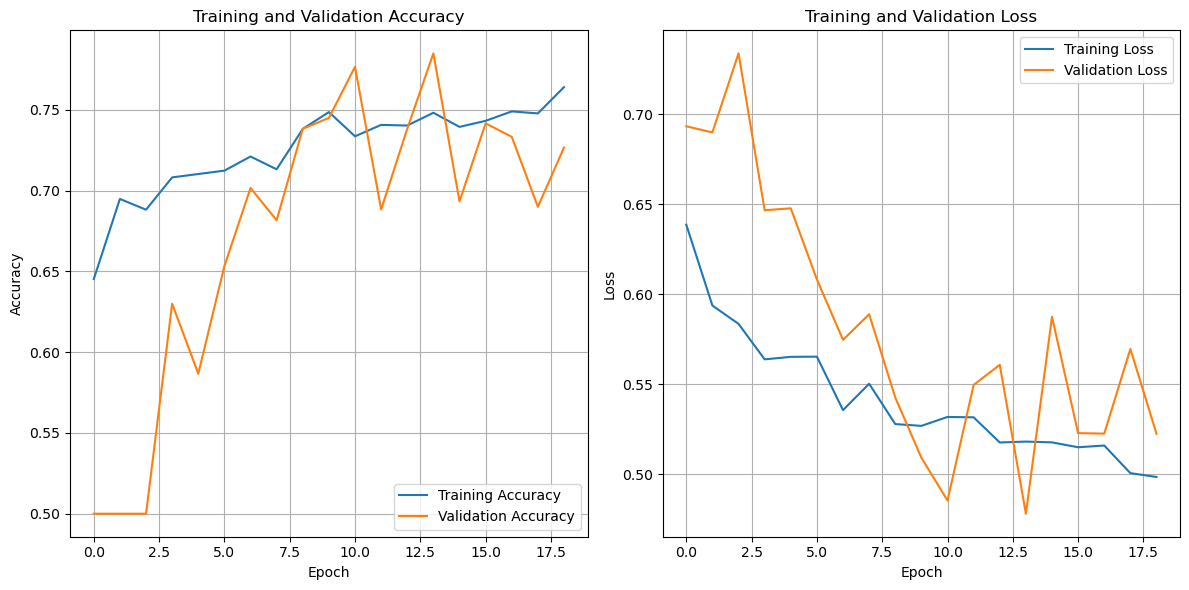

In [19]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

In [21]:
# Load MobileNetV2 as base model
base_model = tf.keras.applications.MobileNetV2(
    weights='imagenet',  # Use pre-trained weights
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze the base model
base_model.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the transfer learning model
model_transfer = Model(inputs=base_model.input, outputs=predictions)

# Compile the transfer learning model
model_transfer.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
    metrics=['accuracy']
)

In [23]:
# Train the transfer learning model
history_transfer = model_transfer.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
)

Epoch 1/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 377ms/step - accuracy: 0.4885 - loss: 0.8087 - val_accuracy: 0.5400 - val_loss: 0.6865
Epoch 2/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 28s 379ms/step - accuracy: 0.5240 - loss: 0.7559 - val_accuracy: 0.5700 - val_loss: 0.6633
Epoch 3/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 385ms/step - accuracy: 0.5597 - loss: 0.7119 - val_accuracy: 0.5800 - val_loss: 0.6543
Epoch 4/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 389ms/step - accuracy: 0.5667 - loss: 0.7137 - val_accuracy: 0.6017 - val_loss: 0.6379
Epoch 5/25
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 391ms/step - accuracy: 0.5941 - loss: 0.6861 - val_accuracy: 0.6317 - val_loss: 0.6242


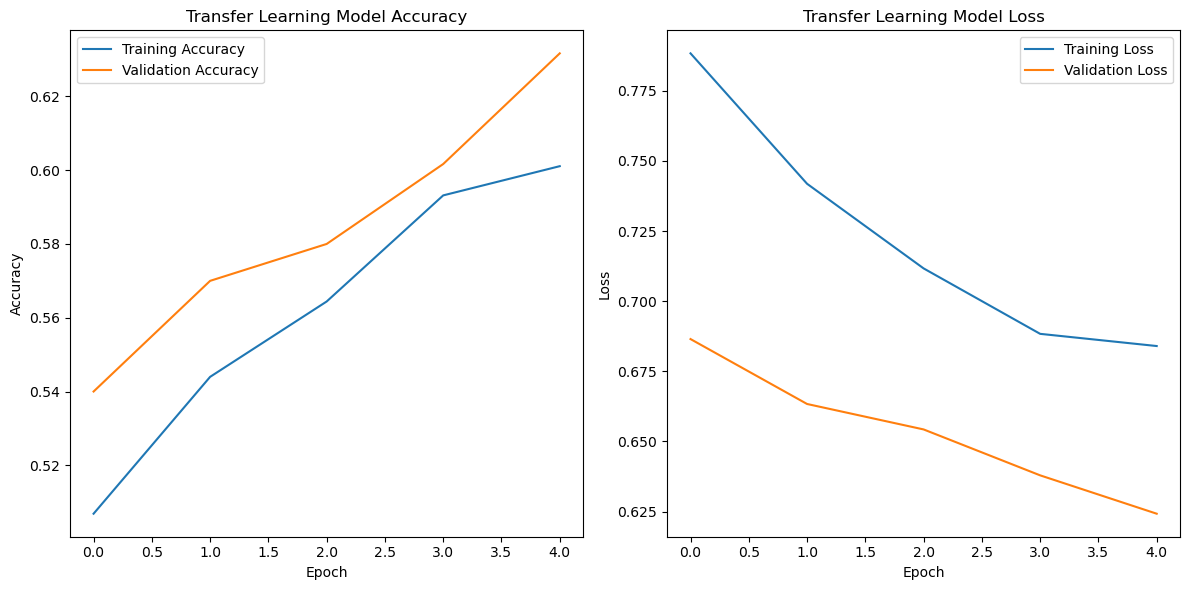

In [25]:
# Plot training and validation accuracy for transfer learning
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_transfer.history['accuracy'], label='Training Accuracy')
plt.plot(history_transfer.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_transfer.history['loss'], label='Training Loss')
plt.plot(history_transfer.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
# Unfreeze some layers of the base model for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-20]:  # Unfreeze the last 20 layers
    layer.trainable = False

# Re-compile the model
model_transfer.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.Adam(learning_rate=1e-5),  # Lower learning rate
    metrics=['accuracy']
)

# Continue training (fine-tuning)
history_fine = model_transfer.fit(
    train_generator,
    epochs=3,
    validation_data=validation_generator
)

Epoch 1/3
75/75 ━━━━━━━━━━━━━━━━━━━━ 35s 411ms/step - accuracy: 0.5281 - loss: 0.7303 - val_accuracy: 0.5750 - val_loss: 0.6593
Epoch 2/3
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 415ms/step - accuracy: 0.6085 - loss: 0.6591 - val_accuracy: 0.6067 - val_loss: 0.6399
Epoch 3/3
75/75 ━━━━━━━━━━━━━━━━━━━━ 33s 436ms/step - accuracy: 0.6496 - loss: 0.6353 - val_accuracy: 0.6317 - val_loss: 0.6108


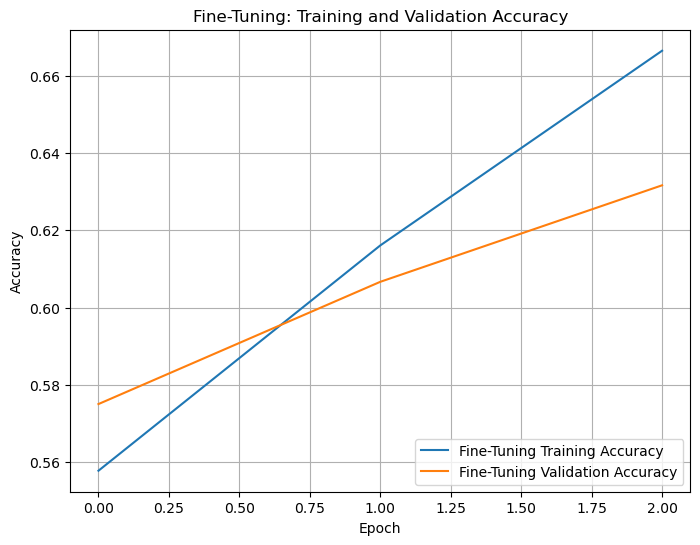

In [29]:
# Plot fine-tuning results
plt.figure(figsize=(8, 6))
plt.plot(history_fine.history['accuracy'], label='Fine-Tuning Training Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Fine-Tuning Validation Accuracy')
plt.title('Fine-Tuning: Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [31]:
# Menyimpan model transfer learning ke format .keras
model_transfer.save('model_transfer_downsyndrome.keras')